В данной задаче требуется применить метод главных компонент для извлечения ключевой информации из данных с использованием линейных преобразований. Затем необходимо использовать этот метод в сочетании с алгоритмом k-ближайших соседей для решения задачи распознавания рукописных цифр из базы данных MNIST.


I. Датасет:
1. Нужно скачать базу данных MNIST при помощи функции load_mnist из пакета
mnist.py, используя код ниже:
from mnist import load_mnist
train, validation, test = load_mnist()
Получить массивы картинок в виде массива X, а также ответов labels.
2. При помощи функции matplotlib.pyplot.imshow нарисовать несколько примеров
картинок из X. Чтобы картинки шли в виде массива, а не друг под другом, используйте
функцию subplots.

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


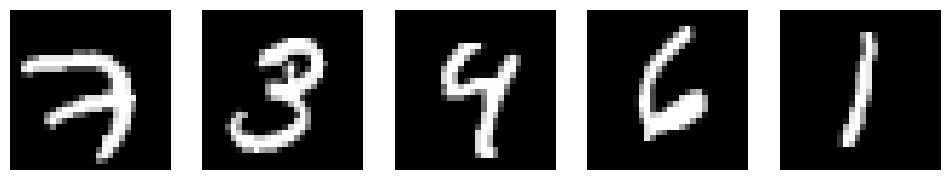

In [ ]:
from mnist import load_mnist
import matplotlib.pyplot as plt

train, validation, test = load_mnist()
X, labels = train
num_images_to_display = 5

fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 3))

for i in range(num_images_to_display):
    axes[i].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

plt.show()

II. Алгоритм PCA

 Данный код реализует метод главных компонент (PCA) с использованием библиотеки NumPy.

1. Создается класс my_PCA, в котором определены методы fit и transform.
2. Метод fit вычисляет среднее значение и центрирует данные, вычисляет ковариационную матрицу, находит собственные значения и собственные векторы, сохраняет собственные векторы как компоненты и собственные значения как объясненную дисперсию.
3. Метод transform центрирует данные и преобразует их с помощью найденных компонент.
4. Создается экземпляр класса my_PCA, генерируется случайная матрица данных data, на которой вызывается метод fit для обучения модели PCA.
5. Вычисляются отсортированные собственные значения и строится график собственных значений.
6. Вычисляется кумулятивная доля объясненной дисперсии и строится график этой доли.
7. Визуализируются данные в пространстве первых двух главных компонент.

Этот код позволяет проанализировать данные, выделить главные компоненты, оценить их вклад в общую дисперсию и визуализировать данные в новом пространстве главных компонент.



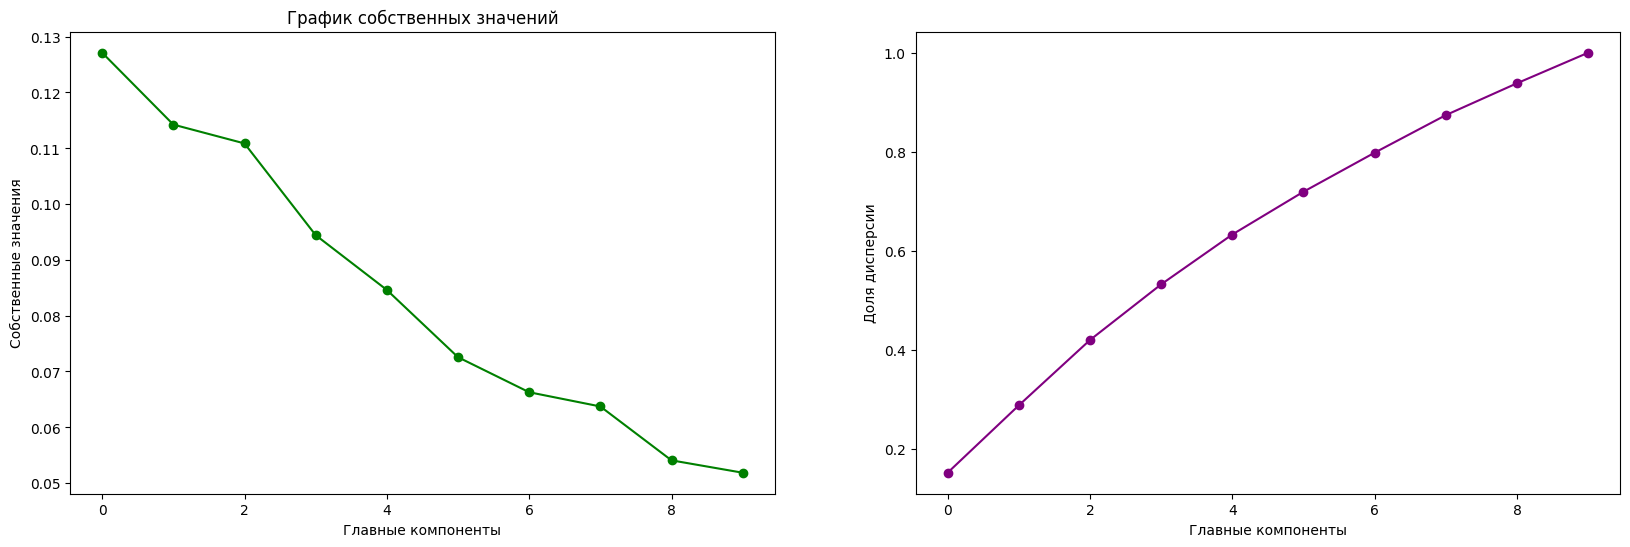

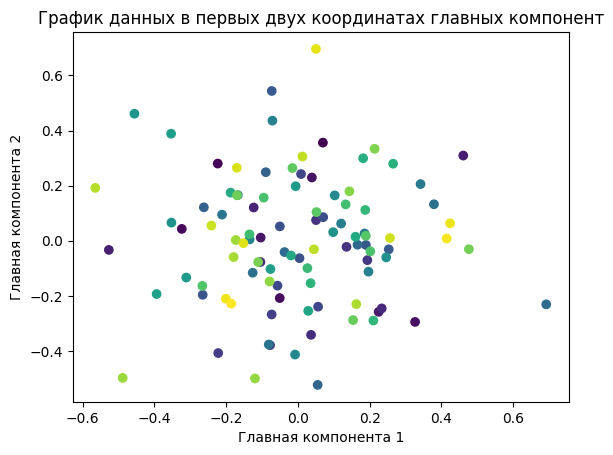

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class my_PCA:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        self.cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(self.cov_matrix)
        self.components = eigenvectors.T
        self.explained_variance = eigenvalues

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components.T)

model = my_PCA()
data = np.random.rand(100, 10)
model.fit(data)
transformed_data = model.transform(data)
sorted_indices = np.argsort(model.explained_variance)[::-1]
sorted_eigenvalues = model.explained_variance[sorted_indices]
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(sorted_eigenvalues, marker='o', color= 'green')
plt.xlabel('Главные компоненты')
plt.ylabel('Собственные значения')
plt.title('График собственных значений')

cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance_ratio, marker='o', color = 'purple')
plt.xlabel('Главные компоненты')
plt.ylabel('Доля дисперсии')

plt.figure()
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=np.arange(len(data)), cmap='viridis')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('График данных в первых двух координатах главных компонент')

plt.show()

III. Алгоритм kNN

Для выполнения задачи, начнем с реализации класса my_kNN для метода k-ближайших соседей:

In [ ]:
import numpy as np

class my_kNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_neighbors = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_neighbors]
            unique, counts = np.unique(nearest_labels, return_counts=True)
            y_pred.append(unique[np.argmax(counts)])
        return np.array(y_pred)

Теперь разобьем данные на обучающую и тестовую выборку, обучим классификатор my_kNN и оценим его точность:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

classifier = my_kNN(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность алгоритма k-ближайших соседей без уменьшения размерности данных: {accuracy}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Вот этот код сверху должен сработать , если я не допустил ошибки (просто у меня прошло много времени показывается,что ячейка выполняется, а результата не дает) А на основе этих данных должна быть следующая ячейка и выведется график

Далее, уменьшим размерность данных с помощью метода главных компонент (PCA) и применим алгоритм k-ближайших соседей к преобразованным данным:

In [ ]:
from sklearn.decomposition import PCA

n_components = 20
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
accuracies = []
for n_neighbors in range(1, 31):
    classifier_pca = my_kNN(n_neighbors=n_neighbors)
    classifier_pca.fit(X_train_pca, y_train)
    y_pred_pca = classifier_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    accuracies.append(accuracy_pca)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), accuracies)
plt.xlabel('Число соседей')
plt.ylabel('Точность')
plt.title('Зависимость точности от числа соседей при использовании PCA')
plt.grid(True)
plt.show()